In [ ]:
# importing the needed libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Data Analysis 1.0..............................................**


## **Uploading all three datasets to choose the best one for my analysis**

In [ ]:
# balanced binary dataset
data_binary_balanced = pd.read_csv("diabetes_balanced.csv")

In [ ]:
# unbalanced binary dataset
data_binary_unbalanced = pd.read_csv("diabetes_binary_unbalanced.csv")

In [ ]:
# unbalanced 3-classes dataset
data_3classes_unbalanced = pd.read_csv("diabetes_3_unbalanced.csv")

## **Getting the value counts of each datasets to look at the degree of inbalance in each one**

In [ ]:
data_binary_balanced["Diabetes_binary"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
data_binary_unbalanced["Diabetes_binary"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [ ]:
data_3classes_unbalanced["Diabetes_012"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

## **Plotting a histogram for each dataset to compare the distribution of all the columns in the 3 datasets back to back**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


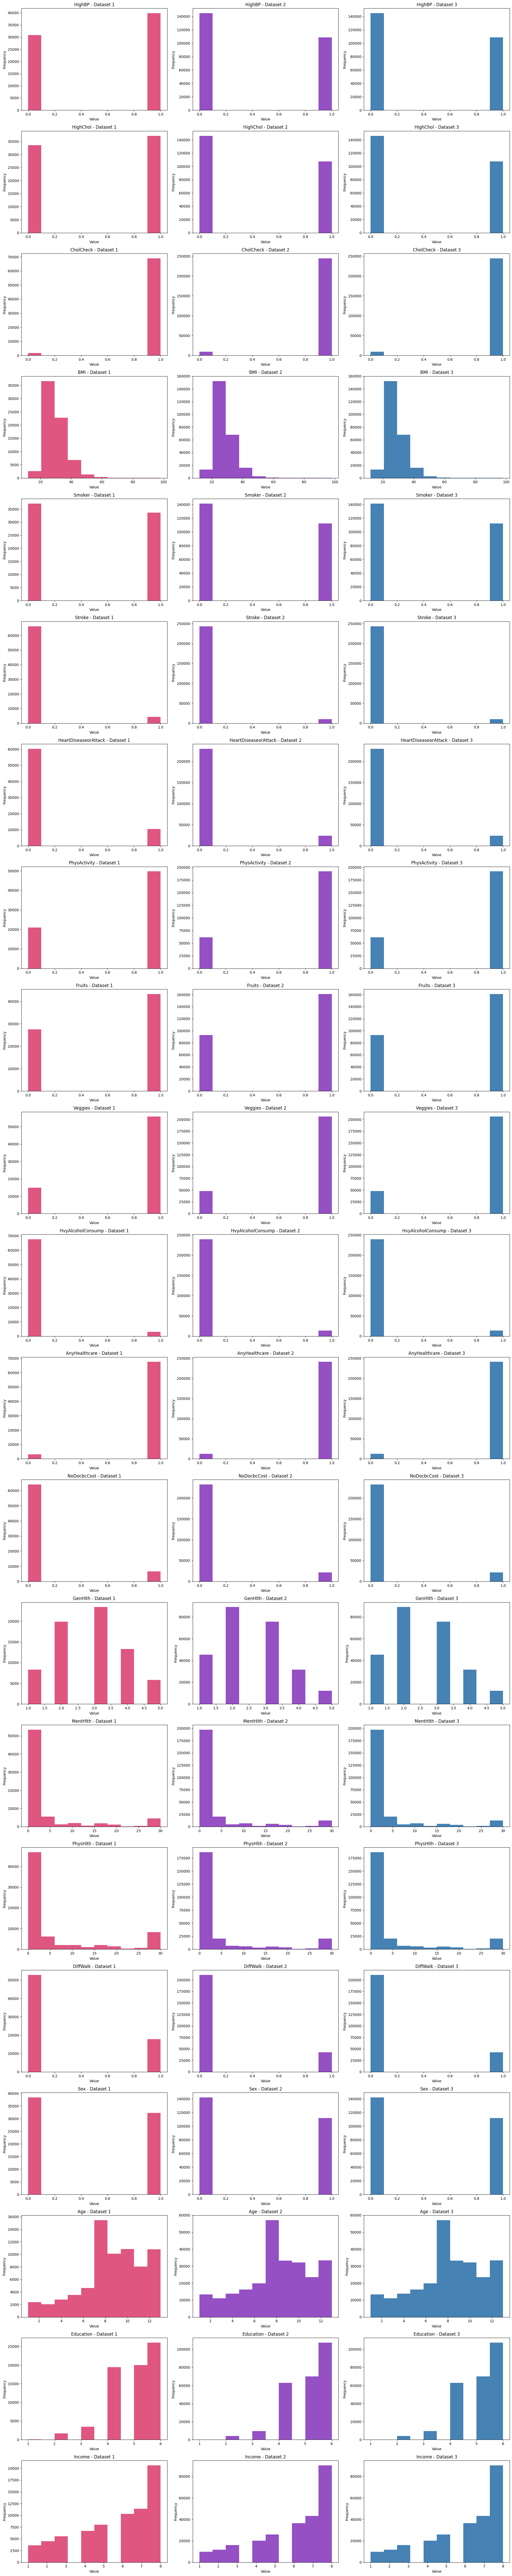

In [ ]:
# Defining and Specifying colors for each dataset::
# Dataset 1 --> data_binary_balanced --> pink
# Dataset 2 --> data_binary_unbalanced --> purple
# Dataset 3 --> data_3classes_unbalanced --> blue

datasets = [data_binary_balanced, data_binary_unbalanced, data_3classes_unbalanced]
colors = ['#df5781', '#9550c4', '#4682B4']

# Creating subplots:
fig, axes = plt.subplots(nrows=len(data_binary_balanced.columns)-1, ncols=len(datasets), figsize=(20, 100))

# Plotting histograms for each column from each dataset:
for i, column in enumerate(data_binary_balanced.columns[1:]):  # Starting from the second column
    for j, dataset in enumerate(datasets):
        ax = axes[i, j] if len(data_binary_balanced.columns) > 1 else axes[j]  # Adjusting for single column
        if column in dataset.columns:
            ax.hist(dataset[column], bins=10, color=colors[j])  # Specifying the color for each dataset
            ax.set_title(f'{column} - Dataset {j+1}')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


.



---



## **My Conclusion: The distribution in all 3 was fairly similar, so I will choose the balanced dataset to not fall victim to bias in results**

In [ ]:
# making a copy of the original balanced binary dataset to not lose it
# I will use .copy() to make sure I'm making a deep copy, not a shallow one
data = data_binary_balanced.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Data Preprocessing..............................................**

In [ ]:
# looking into the types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### After looking at the types of each column and making sure there are no missing values, I need to turn the dataframe from float to boolean to prepare it for Association Rule Mining, but I need to turn the numerical and semi numerical columns (such as: BMI, GenHlth, MentHlth, PhysHlth, Age, Education, and Income) into sub-columns
## **what i need to do: dummy/onehot encoding after dividing the column values into the appropriate intervals**

In [ ]:
# BMI:

# I will be using a new learned method for encoding: pd.get_dummies(), to get
# the appropriate BMI columns

# Dividing the values on the column into standard BMI intervals
bins = [0, 18.5, 24.9, 29.9, np.inf]

# Giving each new interval the appropriate name
labels = ["Is_Underweight", "Is_Normal", "Is_Overweight", "Is_Obese"]


# Encoding

# 1. Turning each numerical value in the specified bins list into the
# corresponding string value in the labels liat
data["BMI"] = pd.cut(data['BMI'], bins = bins, labels = labels, right = False)

# 2. Making a dataframe that has columns of the new string values in the "BMI" column:
encoded_data_BMI = pd.get_dummies(data["BMI"])

# 3. Joining the new dataframe to the dataset and dropping the previous BMI column:
data = data.join(encoded_data_BMI)
data.drop(["BMI"], axis = 1, inplace = True)

In [ ]:
# GenHlth:

# I'm using OneHotEnconding to refresh my memory on what I learned in ML1

# Storing the Encoder with the specifed category in a variable:
encoderOrdinal = OneHotEncoder(categories = [range(1, 6)])

# Making a dataframe of the original GenHlth data using the encoder and then
# giving the new columns the appropriate labels according to the data description
encoded_data_GenHlth = pd.DataFrame(encoderOrdinal.fit_transform(data[["GenHlth"]]).toarray())
encoded_data_GenHlth.columns = ["GenHlth_Excellent", "GenHlth_VeryGood", "GenHlth_Good", "GenHlth_Fair", "GenHlth_Poor"]

# Joining the new dataframe to the dataset and dropping the previous GenHlth column:
data = data.join(encoded_data_GenHlth)
data.drop(["GenHlth"], axis = 1, inplace = True)

In [ ]:
# MentHlth:

# I will use pd.get_dummies() and follow the same procedure I followed in
# processing the BMI column

# After looking at the data description, I divided the column into 3 bins:
# Good: if they spent 0 to 9 days feeling bad mentally
# Fair: if they spent 10 to 19 days feeling bad mentally
# Bad: if they spent 20 to 30 days feeling bad mentally

bins = [0, 10, 20, 31]
labels = ["MentHlth_Good", "MentHlth_Fair", "MentHlth_Bad"]
data["MentHlth"] = pd.cut(data["MentHlth"], bins = bins, labels = labels, right = False)
encoded_data_BMI = pd.get_dummies(data["MentHlth"])

data = data.join(encoded_data_BMI)
data.drop(["MentHlth"], axis = 1, inplace = True)

In [ ]:
# PhysHlth:

# I will use pd.get_dummies() and follow the same procedure I followed in
# processing the BMI column

# After looking at the data description, I divided the column into 3 bins:
# Good: if they spent 0 to 9 days feeling bad physically
# Fair: if they spent 10 to 19 days feeling bad physically
# Bad: if they spent 20 to 30 days feeling bad physically

bins = [0, 10, 20, 31]
labels = ["PhysHlth_Good", "PhysHlth_Fair", "PhysHlth_Bad"]
data["PhysHlth"] = pd.cut(data["PhysHlth"], bins = bins, labels = labels, right = False)
encoded_data_BMI = pd.get_dummies(data["PhysHlth"])

data = data.join(encoded_data_BMI)
data.drop(["PhysHlth"], axis = 1, inplace = True)

In [ ]:
# Sex:

# I want to give each gender their disignated column
data["Gender_Male"] = data["Sex"]
data["Gender_Female"] = 1 - data["Sex"]

# Dropping the "Sex" column since it's replaced now
data.drop(["Sex"], axis = 1, inplace = True)

In [ ]:
# Age:

# The age column was numerically encoded into 13 categories, I wanted to keep
# the categories but do more categorization representing life periods and experinces,
# like this:
# 18-24: Young Adults --> 1
# 25-39: Adults --> 2, 3, 4
# 40-64: Midlife Adults --> 5, 6, 7, 8, 9
# 65-79: Senior Adults --> 10, 11, 12
# 80+: Elderly --> 13

# I got to know what each number from 1 to 13 mean from a codebook provided by
# who cleaned the kaggle Diabetes Health Indicators dataset

# How the bins work:
# [1, 2), [2, 5), [5, 10), [10, 13), [13, ∞)
bins = [1, 2, 5, 10, 13, np.inf]
labels = ["18-24", "25-39", "40-64", "65-79", "+80"]

data["Age"] = pd.cut(data["Age"], bins = bins, labels = labels, right = False)
encoded_data_BMI = pd.get_dummies(data["Age"])

data = data.join(encoded_data_BMI)
data.drop(["Age"], axis = 1, inplace = True)

In [ ]:
# Education:

# This column is also numerically encoded.
# I kept the categories as they were without extra categorization.

# The description of each category:
# 1: Never attended school or only kindergarten
# 2: Grades 1 through 8 (Elementary)
# 3: Grades 9 through 11 (Some high school)
# 4: Grade 12 or GED (High school graduate)
# 5: College 1 year to 3 years (Some college or technical school)
# 6: College 4 years or more (College graduate)

# How the bins work:
# [1, 2), [2, 3), [3, 5), [5, 6), [6, ∞)
bins = [1, 2, 3, 5, 6, np.inf]
labels = ["No_Education", "Education_MS", "Education_HS", "Education_Undergrad", "Education_Grad"]
data["Education"] = pd.cut(data["Education"], bins = bins, labels = labels, right = False)
encoded_data_Education = pd.get_dummies(data["Education"])

data = data.join(encoded_data_Education)
data.drop(["Education"], axis = 1, inplace = True)

In [ ]:
# Income:

# This column is also numerically encoded.
# I got the description from the codebook mentioned in kaggle.
# I will be doing extra categorization representing 3 income levels: low, mid and high.

# The original description:
# 1: < $10,000
# 2: < $15,000
# 3: < $20,000
# 4: < $25,000
# 5: < $35,000
# 6: < $50,000
# 7: < $75,000
# 8: >= $75,000

# Extra Categorization:
# 1-3: Low_Income: < $20,000
# 4-7: Mid_Income: < $75,000
# 8: High_Income >= $75,000

# How the bins work:
# [1, 4), [4, 8), [8, ∞)
bins = [1, 4, 8, np.inf]
labels = ["Low_Income", "Mid_Income", "High_Income"]
data["Income"] = pd.cut(data["Income"], bins = bins, labels = labels, right = False)
encoded_data_Income = pd.get_dummies(data["Income"])

data = data.join(encoded_data_Income)
data.drop(["Income"], axis = 1, inplace = True)

### **After Preprocessing, I can turn the dataframe into boolean.**

In [ ]:
# turn the dataframe into boolean
data = data.astype(bool)

# **Frequent Itemset Mining 1.0..............................................**


### **Chosen min_sups and the frequent itemsets i got:**


---


min_sup: 0.3 ---> frequent itemsets: 456

---

min_sup: 0.4 ---> frequent itemsets: 166

---

min_sup: 0.5 ---> frequent itemsets: 78

---

min_sup: 0.6 ---> frequent itemsets: 32

---
.
### **My choice of Minimum Support:**
I chose a relatively low min_sup (minimum support) to evaluate the amount of itemsets that'll get generated and decided whether more itemsets are needed or not. Turns outt he total number of itemsets was very high, so i worked my way up to a higher min_sup to lessen the frequent itemsets.

In [ ]:
frequent_itemsets = apriori(data, min_support = 0.6, use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.975259,(CholCheck)
1,0.703036,(PhysActivity)
2,0.611795,(Fruits)
3,0.788774,(Veggies)
4,0.954960,(AnyHealthcare)
5,0.851794,(MentHlth_Good)
6,0.779720,(PhysHlth_Good)
7,0.685056,"(CholCheck, PhysActivity)"
8,0.769281,"(Veggies, CholCheck)"
9,0.934773,"(CholCheck, AnyHealthcare)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **My insights relating the generated frequent itemsets:**
I don't see any concrete logical reason why the following frequent itemsets: (AnyHealthcare), (MentHlth_Good), (PhysHlth_Good) would lead Diabetes. I will generate the association rules and then further investigate the columns.

# **Association Rules Mining 1.0..............................................**


### **Chosen min_conf and the association rules i got:**


---


min_conf: 0.70 ---> association rules: 103

---

min_conf: 0.75 ---> association rules: 92

---

min_conf: 0.80 ---> association rules: 69

---

min_conf: 0.85 ---> association rules: 52

---
.
### **My choice of Minimum Confidence:**
I chose a relatively high min_conf (minimum confidence) to prune the total number of rules. The total number of rules was very high, so i worked my way up to a higher min_conf to lessen the association rules.

In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.85)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PhysActivity),(CholCheck),0.703036,0.975259,0.685056,0.974426,0.999146,-0.000586,0.967435,-0.002870
1,(Veggies),(CholCheck),0.788774,0.975259,0.769281,0.975287,1.000029,0.000022,1.001136,0.000136
2,(CholCheck),(AnyHealthcare),0.975259,0.954960,0.934773,0.958487,1.003694,0.003441,1.084984,0.148768
3,(AnyHealthcare),(CholCheck),0.954960,0.975259,0.934773,0.978862,1.003694,0.003441,1.170444,0.081720
4,(CholCheck),(MentHlth_Good),0.975259,0.851794,0.831141,0.852226,1.000507,0.000421,1.002924,0.020491
5,(MentHlth_Good),(CholCheck),0.851794,0.975259,0.831141,0.975754,1.000507,0.000421,1.020402,0.003421
6,(PhysHlth_Good),(CholCheck),0.779720,0.975259,0.758417,0.972678,0.997353,-0.002013,0.905532,-0.011903
7,(PhysActivity),(AnyHealthcare),0.703036,0.954960,0.673938,0.958611,1.003824,0.002567,1.088219,0.012826
8,(PhysActivity),(MentHlth_Good),0.703036,0.851794,0.619448,0.881104,1.034410,0.020606,1.246523,0.112019
9,(Veggies),(AnyHealthcare),0.788774,0.954960,0.755715,0.958088,1.003276,0.002468,1.074650,0.015460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **My insight relating the generated rules:**
I don't see any logical relation between many antecedents and consequents. So, I'll look into the columns.

#**Data Analysis 2.0..............................................**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


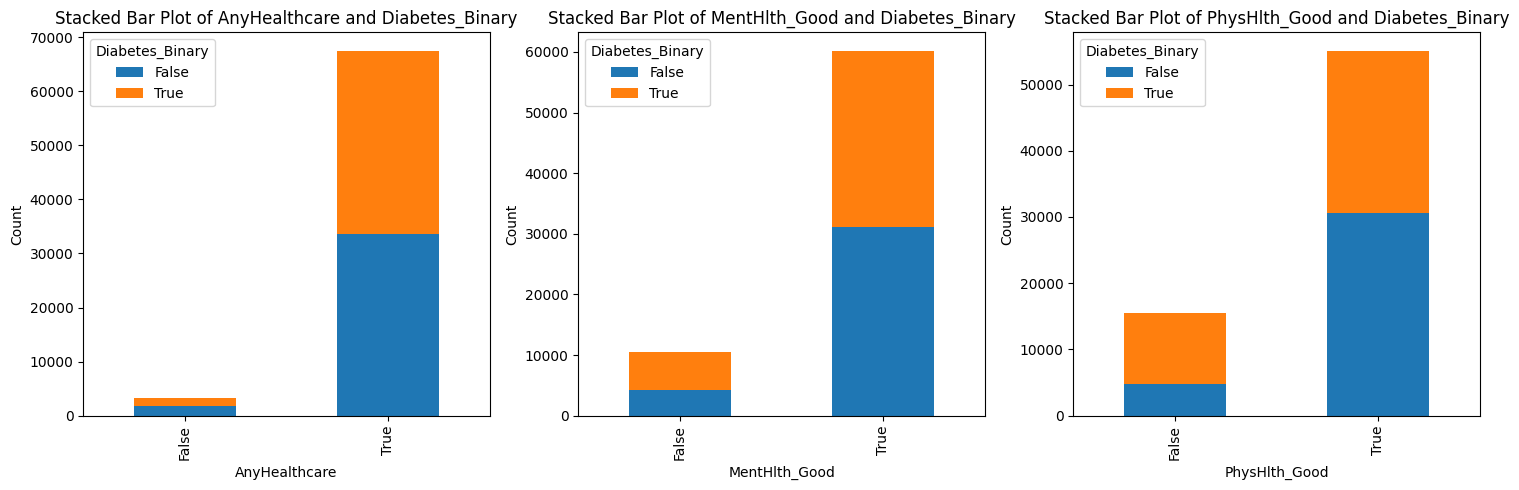

In [ ]:

# Create a figure with 1x3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create stacked bar plots for each variable
variables = ['AnyHealthcare', 'MentHlth_Good', 'PhysHlth_Good']
for i, var in enumerate(variables):
    cross_tab = pd.crosstab(data[var], data['Diabetes_binary'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Stacked Bar Plot of {var} and Diabetes_Binary')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Diabetes_Binary')

# Adjust layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


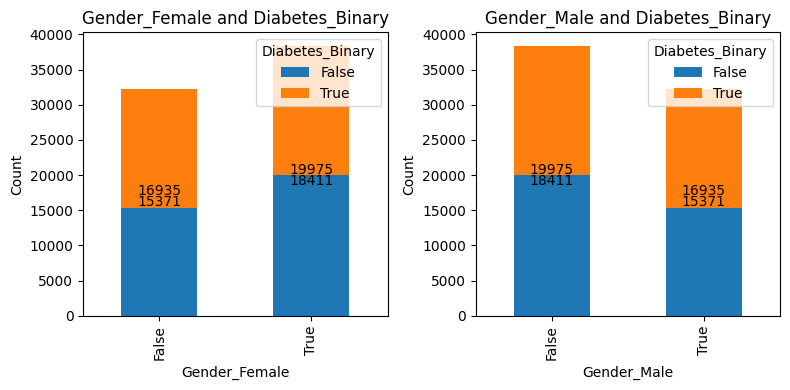

In [ ]:
# Creating figure with 1x2 subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 4))

# Creating stacked bar plots for each gender
genders = ['Gender_Female', 'Gender_Male']
for i, gender in enumerate(genders):
    cross_tab = pd.crosstab(data[gender], data['Diabetes_binary'])
    stacked_bars = cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{gender} and Diabetes_Binary')
    axes[i].set_xlabel(gender)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Diabetes_Binary')

    # Annotating each stacked bar
    for bar in stacked_bars.patches:
        axes[i].annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', xytext=(0, 4),
                         textcoords='offset points')


plt.tight_layout()
plt.show()


### **I will be dropping all 5 columns since the binary classes are divided in half in each value of the column**





In [ ]:
# Copying the data to not lose the original
data_test = data.copy()

In [ ]:
# Dropping the values:
data_test.drop(["MentHlth_Good"], axis = 1, inplace = True)
data_test.drop(["PhysHlth_Good"], axis = 1, inplace = True)
data_test.drop(["AnyHealthcare"], axis = 1, inplace = True)
data_test.drop(["Gender_Female"], axis = 1, inplace = True)
data_test.drop(["Gender_Male"], axis = 1, inplace = True)

#**Frequent Itemset Mining 2.0..............................................**


### **Chosen min_sups and the frequent itemsets i got:**


---


min_sup: 0.3 ---> frequent itemsets: 82

---

min_sup: 0.4 ---> frequent itemsets: 31


In [204]:
# Generating frequent itemsets from new data
frequent_itemsets=apriori(data_test, min_support = 0.4, use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.500000,(Diabetes_binary)
1,0.563458,(HighBP)
2,0.525703,(HighChol)
3,0.975259,(CholCheck)
4,0.475273,(Smoker)
5,0.703036,(PhysActivity)
6,0.611795,(Fruits)
7,0.788774,(Veggies)
8,0.444803,(Is_Obese)
9,0.477494,(40-64)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Association Rule Mining 2.0..............................................**


### **Chosen min_conf and the association rules i got:**


---


min_conf: 0.70 ---> association rules: 38


In [205]:
# Generating association rules from new data
association_rules(frequent_itemsets, metric="confidence", min_threshold = 0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Diabetes_binary),(CholCheck),0.500000,0.975259,0.496591,0.993182,1.018378,0.008961,3.628631,0.036092
1,(HighBP),(CholCheck),0.563458,0.975259,0.557475,0.989380,1.014480,0.007957,2.329761,0.032696
2,(HighBP),(Veggies),0.563458,0.788774,0.430954,0.764837,0.969654,-0.013487,0.898213,-0.066895
3,(HighChol),(CholCheck),0.525703,0.975259,0.519366,0.987945,1.013008,0.006669,2.052354,0.027074
4,(HighChol),(Veggies),0.525703,0.788774,0.405930,0.772166,0.978945,-0.008731,0.927105,-0.043381
5,(Smoker),(CholCheck),0.475273,0.975259,0.463178,0.974552,0.999275,-0.000336,0.972225,-0.001380
6,(CholCheck),(PhysActivity),0.975259,0.703036,0.685056,0.702435,0.999146,-0.000586,0.997982,-0.033391
7,(PhysActivity),(CholCheck),0.703036,0.975259,0.685056,0.974426,0.999146,-0.000586,0.967435,-0.002870
8,(Fruits),(CholCheck),0.611795,0.975259,0.597974,0.977410,1.002206,0.001316,1.095219,0.005669
9,(Veggies),(CholCheck),0.788774,0.975259,0.769281,0.975287,1.000029,0.000022,1.001136,0.000136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Explaining the results:**


For starters, the dataset had 22 columns describing the following list for each person whose data was recorded:
- Health Status (Diabetes_Binary, HighBP, HighChol, CholCheck, BMI).
- Lifestyle Habits (Smoker, PhysActivity, Fruits, Veggies, HvyAlcoholConsump)
- Medical History (Stroke, HeartDiseaseorAttack, DiffWalk).
- Demographics and Socioeconomics (Sex, Age, Education, Income).
- Access to Healthcare (AnyHealthcare, NoDocbcCost).
- General Health Assessment (GenHlth, MentHlth, PhysHlth).  


After diving into the dataset and fully analyzing it at the end, I decided to drop the "Sex" column and 2 sub-columns derived from the "MentHlth" and "PhysHlth" columns. After full preprocessing, i started Association Rule Mining and chose the appropriate min_sup and min_conf for my data, and that led me to the following insights:

The dataset is presenting a connection between high cholesterol and high blood pressure with diabetes, which led to:

## **Insights from Frequent Itemsets:**

### - Regular Cholesterol Checks and Diabetes:

Frequent Itemset: {CholCheck, Diabetes_binary}
Support: 49.6%
Insight: Individuals who regularly check their cholesterol levels are highly likely to have diabetes. This emphasizes the importance of cholesterol monitoring as a potential indicator or risk factor for diabetes.

.
##### In frequent 2-itemsets, the column "CholCheck" is present with many of the frequent 1-itemsets, and that was shown in the association rules.

-----

.

## **Insights from Association Rules:**

### - High Blood Pressure and Cholesterol Check Leading to Diabetes:
The association rule {Diabetes_binary} → {CholCheck} suggests a potential relationship between diabetes status and the frequency of cholesterol checks. Specifically, it implies that individuals who have been diagnosed with diabetes (as indicated by the variable Diabetes_binary) are more likely to undergo regular cholesterol screenings (CholCheck).
#### ***This establishes a link between cholesterol checks and diabetes***
### - Age and Cholesterol Monitoring:
The association rule {40-64} → {CholCheck} indicates a robust connection between individuals aged 40-64 and regular cholesterol checks. This implies a proactive approach to health management within this age group, potentially driven by awareness of age-related health risks, including diabetes.

### - Obesity and Cholesterol Screening:
The association rule {Is_Obese} → {CholCheck} highlights a significant link between obesity and the likelihood of undergoing cholesterol checks. This suggests that individuals classified as obese are actively engaged in monitoring their cholesterol levels, potentially as part of broader health management strategies, including diabetes prevention.

### - Socioeconomic and Diabetes:
The association rule {Mid_Income} → {CholCheck} suggests that individuals with moderate incomes are more likely to undergo cholesterol checks, which means they may have a higher chance to have diabetes.

### - Dietary Habits and Diabetes Prevention
Association rules such as {Veggies, Fruits} → {CholCheck} highlight the influence of dietary habits on preventive health behaviors.
Consuming a diet rich in vegetables and fruits is essential for individuals with diabetes, as it helps regulate blood sugar levels and reduces the risk of diabetes-related complications. The association between dietary habits and cholesterol checks suggests a holistic approach to diabetes management that incorporates healthy eating behaviors alongside preventive health measures.

### - Smoking and Cholesterol Checks:
The association rule {Smoker} → {CholCheck} shows a noticable correlation between smoking habits and the propensity to undergo cholesterol checks. The strong association between smoking and cholesterol checks suggests a proactive health mindset among smokers, which may indirectly contribute to diabetes prevention efforts, given the established link between smoking and diabetes risk.
